## Importing and Reading Data

Import all the required libraries

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

Reading Data

In [3]:
import os

In [4]:
os.chdir('D:\ML project')
os.getcwd()

'D:\\ML project'

In [5]:
data=pd.read_csv("hpc_breakdowns.csv",infer_datetime_format=True,parse_dates=[['Date','Time']], index_col='Date_Time')

In [6]:
data.head(3)

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,,
2006-12-16 17:24:00,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Unnamed: 0               int64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), int64(1)
memory usage: 140.7 MB


In [8]:
data.dtypes

Unnamed: 0                 int64
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [9]:
data.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.047237e+06,2.048803e+06,2.047249e+06,2.047279e+06,2.047983e+06,2.048070e+06,2.049151e+06
mean,1.031496e+06,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,5.964586e+05,1.057290e+00,1.127240e-01,3.238838e+00,4.444695e+00,6.153978e+00,5.823372e+00,8.437150e+00
min,0.000000e+00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.162538e+05,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.028638e+06,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.545307e+06,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2.075258e+06,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [10]:
data.var()

Unnamed: 0               3.557629e+11
Global_active_power      1.117862e+00
Global_reactive_power    1.270670e-02
Voltage                  1.049007e+01
Global_intensity         1.975531e+01
Sub_metering_1           3.787145e+01
Sub_metering_2           3.391166e+01
Sub_metering_3           7.118551e+01
dtype: float64

In [11]:
data.shape

(2049280, 8)

## Exploratory Data Analysis

Checking for missing values

In [12]:
data.isnull().sum()

Unnamed: 0                  0
Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Global_intensity         2001
Sub_metering_1           1297
Sub_metering_2           1210
Sub_metering_3            129
dtype: int64

### Boxplots to visualize missing data

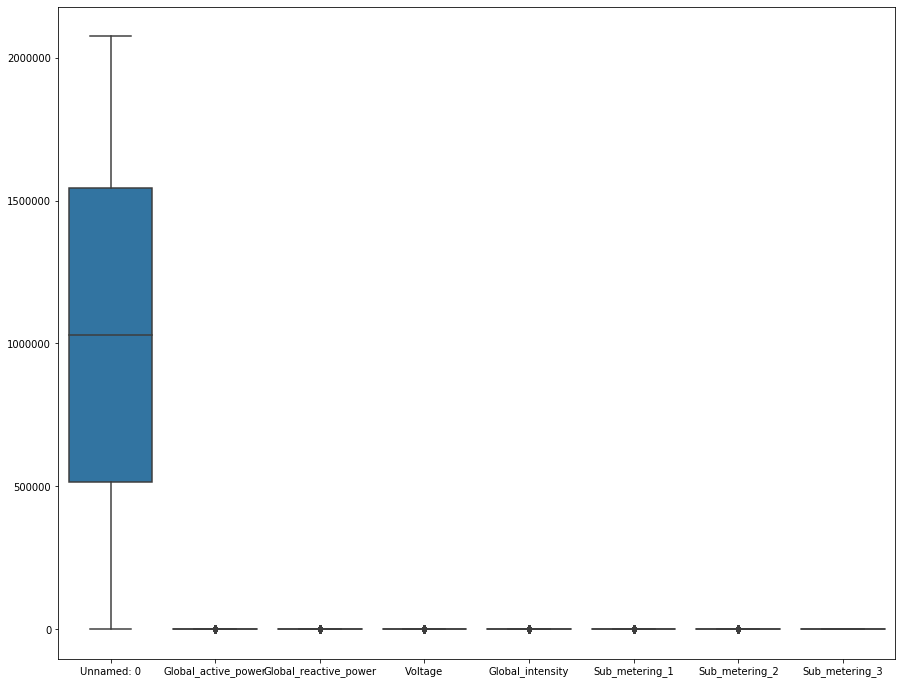

In [13]:
plt.figure(figsize=(15,12))
sns.boxplot(data = data)

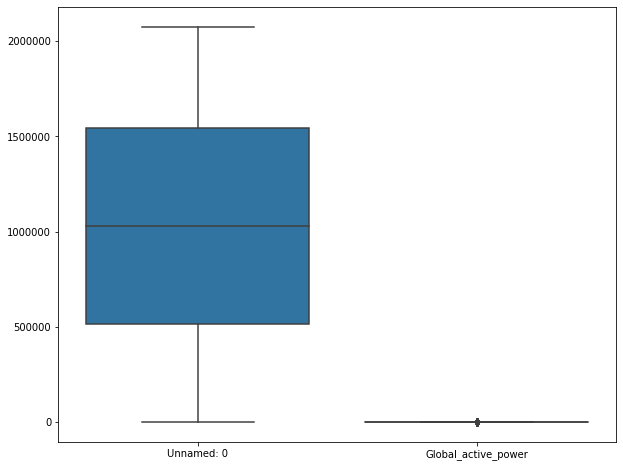

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, :2])

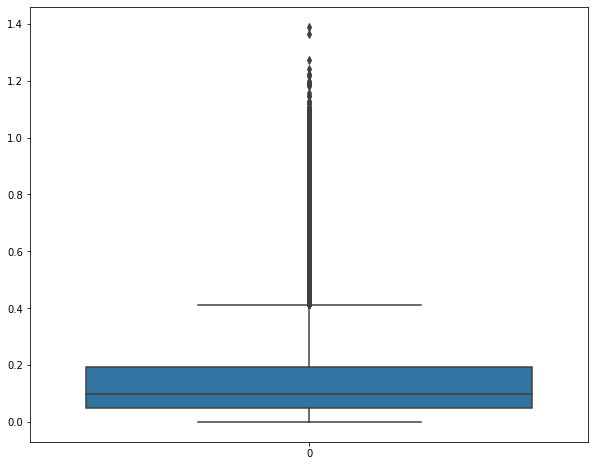

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, 2])

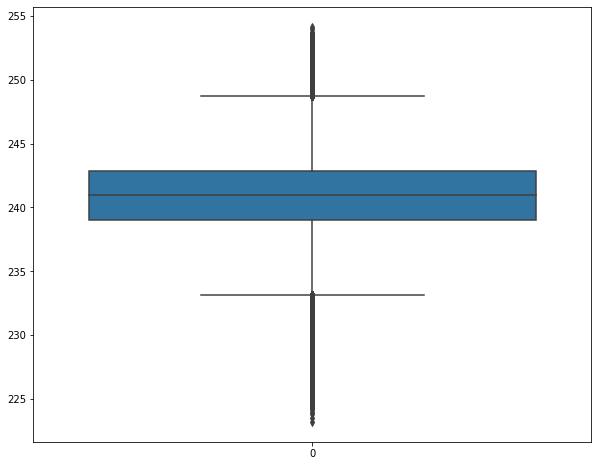

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, 3])

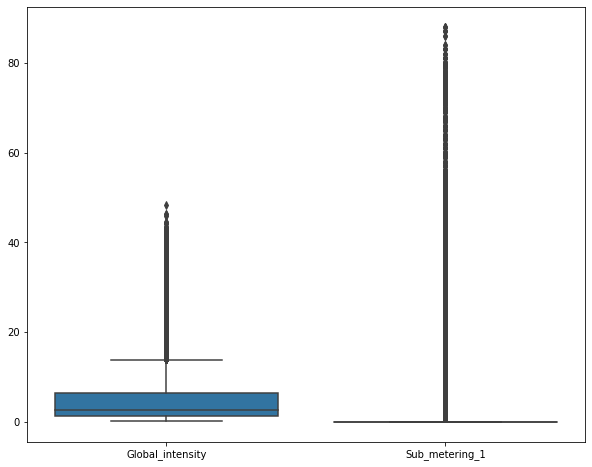

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, 4:6])

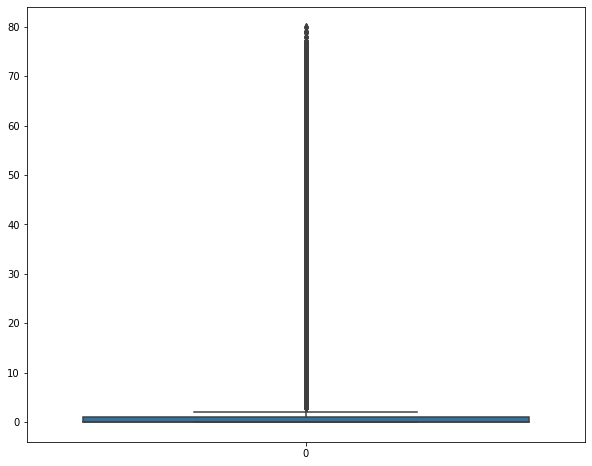

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(data = data.iloc[:, 6])

### Data Cleaning

In [19]:
for i in range(0,8):        
        data.iloc[:,i]=data.iloc[:,i].fillna(data.iloc[:,i].mean())

In [20]:
data.isnull().sum()

Unnamed: 0               0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Resampling Data

In [21]:
data_res_sum = data.resample('M').sum()
data_res_sum.var()

Unnamed: 0               6.567926e+20
Global_active_power      1.498239e+08
Global_reactive_power    1.146198e+06
Voltage                  7.801040e+11
Global_intensity         2.471681e+09
Sub_metering_1           2.372843e+08
Sub_metering_2           2.790190e+08
Sub_metering_3           4.638268e+09
dtype: float64

Due to very high variance we will resample with mean

In [22]:
data_res = data.resample('M').mean()
data_res.var()

Unnamed: 0               3.759743e+11
Global_active_power      8.942071e-02
Global_reactive_power    4.797167e-04
Voltage                  2.417981e+00
Global_intensity         1.481130e+00
Sub_metering_1           1.139900e-01
Sub_metering_2           1.507990e-01
Sub_metering_3           2.355288e+00
dtype: float64

In [23]:
data_res.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1.029336e+06,1.099316,0.123689,240.854246,4.659706,1.121231,1.303708,6.474409
std,6.131675e+05,0.299033,0.021902,1.554986,1.217017,0.337624,0.388328,1.534695
min,1.099708e+04,0.276488,0.087164,235.180782,1.263569,0.086765,0.501135,1.784690
25%,5.142953e+05,0.965788,0.109515,240.359153,4.144653,0.970688,1.061207,5.612713
50%,1.030363e+06,1.123354,0.124889,240.879684,4.712009,1.184714,1.256157,6.753966
75%,1.544976e+06,1.280198,0.131733,241.738879,5.361986,1.307593,1.605991,7.358702
max,2.056627e+06,1.902314,0.188426,244.083697,8.021025,1.696617,2.346872,10.211667


In [24]:
data_res.head(3)

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,,
2006-12-31,10997.084485,1.902314,0.131386,241.441125,8.021025,1.252769,2.214987,7.409558
2007-01-31,44315.161499,1.546008,0.132676,240.902849,6.548496,1.266726,1.775931,7.383351
2007-02-28,86794.931569,1.401084,0.113637,240.517972,5.915439,1.180217,1.602361,6.703557


### Plotting time-series Curves

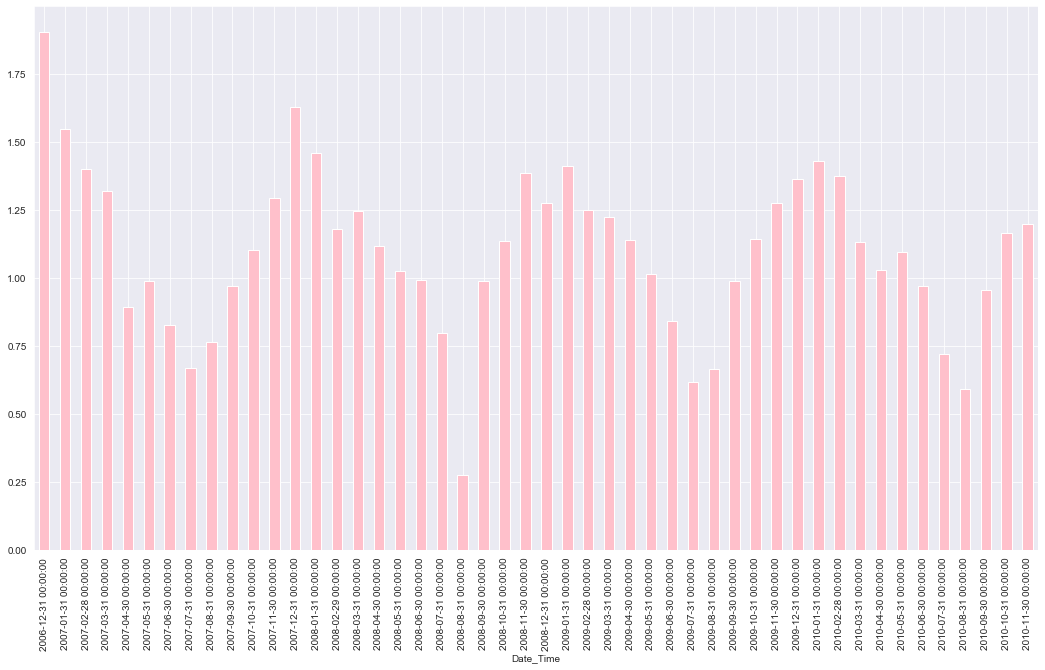

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize = (18,10))
data_res['Global_active_power'].plot(kind = 'bar', color = 'pink')

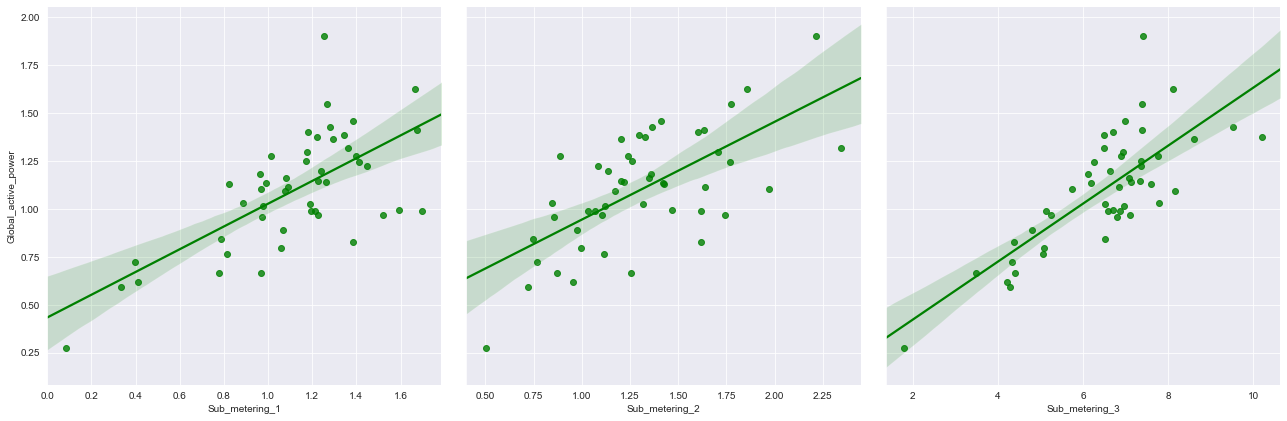

In [26]:
g = sns.PairGrid(data = data_res, y_vars= 'Global_active_power', x_vars = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], height=6)
g.map(sns.regplot, color = 'green')

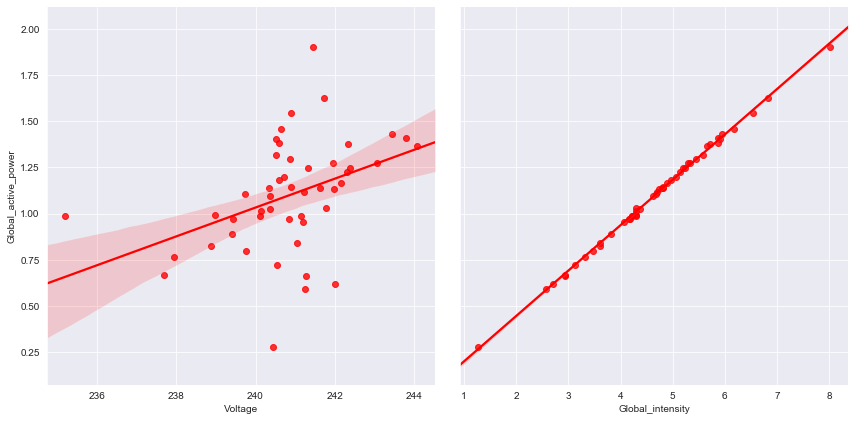

In [27]:
g = sns.PairGrid(data = data_res, y_vars= 'Global_active_power', x_vars = ['Voltage', 'Global_intensity'], height=6)
g.map(sns.regplot, color = 'red')

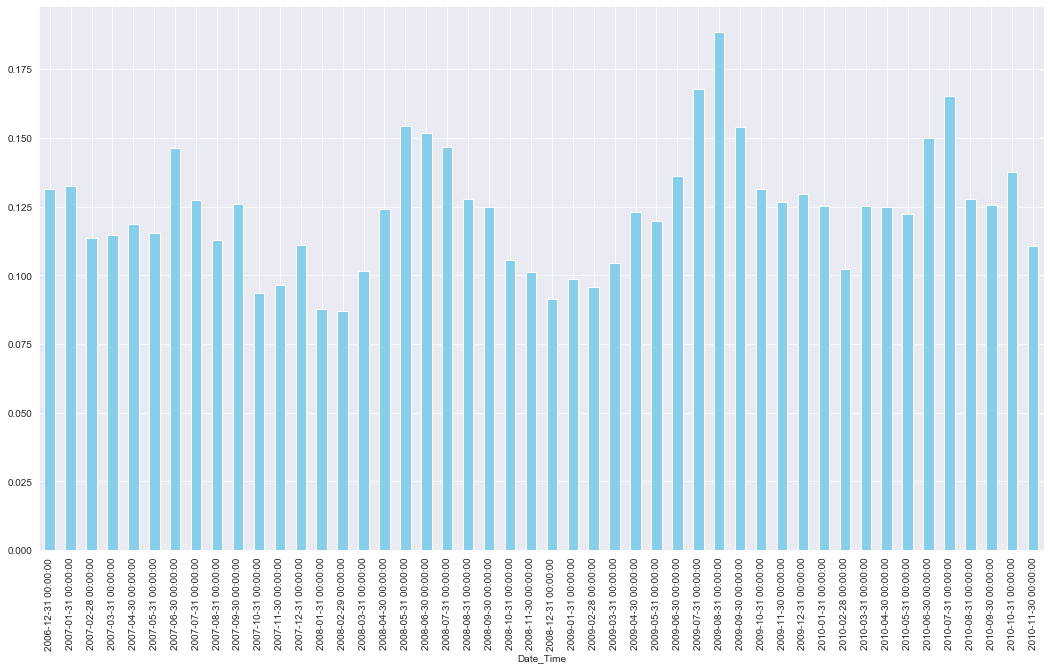

In [28]:
plt.figure(figsize = (18,10))
data_res['Global_reactive_power'].plot(kind = 'bar', color = 'skyblue')

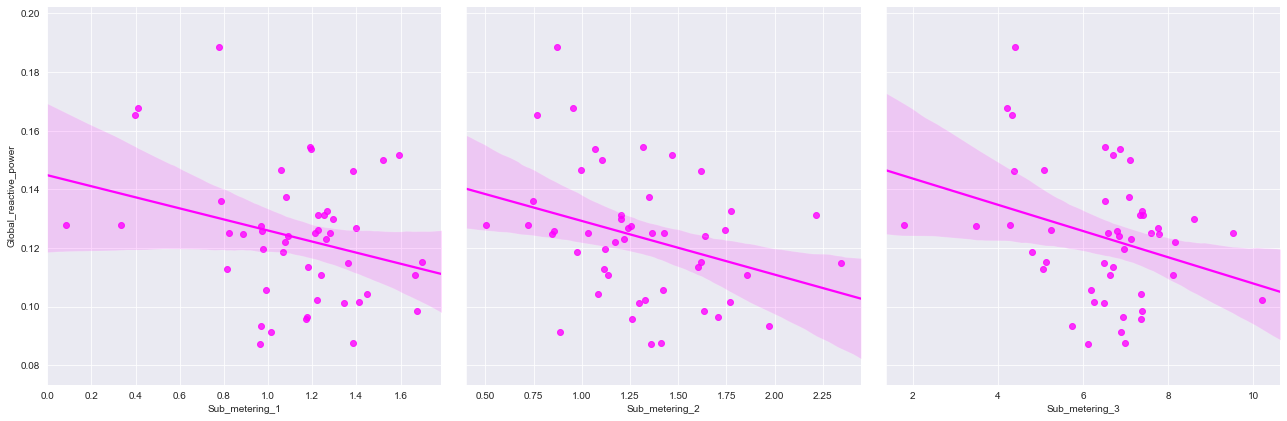

In [29]:
g = sns.PairGrid(data = data_res, y_vars= 'Global_reactive_power', x_vars = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], height=6)
g.map(sns.regplot, color = 'magenta')

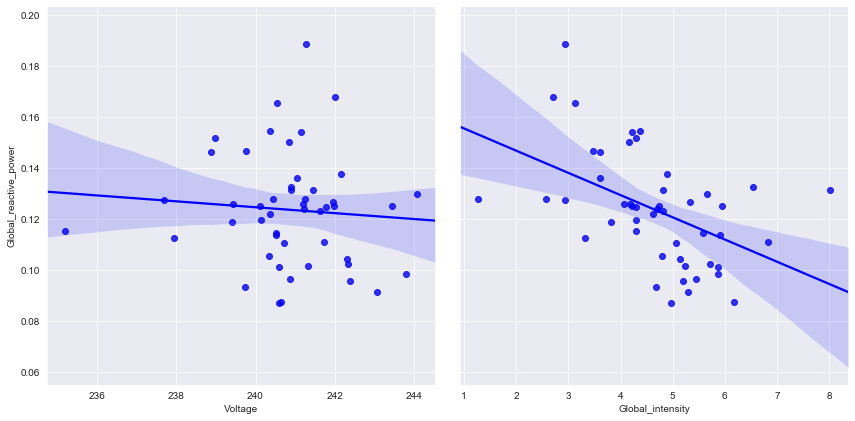

In [30]:
g = sns.PairGrid(data = data_res, y_vars= 'Global_reactive_power', x_vars = ['Voltage', 'Global_intensity'], height=6)
g.map(sns.regplot, color = 'blue')

Checking Correlation

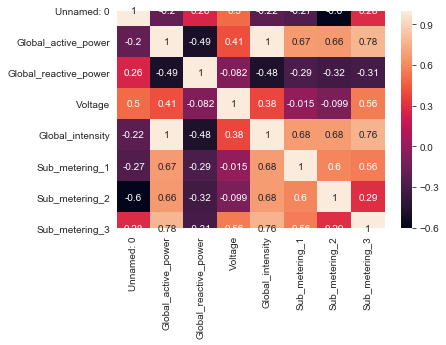

In [31]:
corr = data_res.corr()
sns.heatmap(corr, annot=True)

### Feature Engineering

Dividing data into features and labels

In [32]:
X = data_res.drop('Global_active_power', axis = 1).values
y = data_res['Global_active_power'].values
print(X.shape)

(48, 7)


Preprocessing

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(48, 7)

Dimensionality Reduction

<BarContainer object of 7 artists>

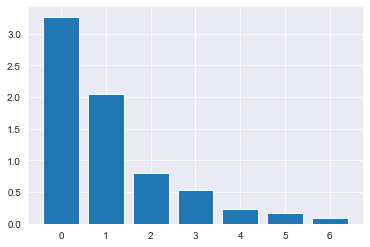

In [34]:
pca = PCA()
pca.fit(X)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)

In [35]:
pca_new = PCA(n_components= 3)
X = pca_new.fit_transform(X)
print(X.shape)

(48, 3)


Performing Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,  random_state=42)

## Time to train model

K Nearest Neighbors

In [37]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', knn.score(X_train, y_train))
print('Testing score: ', knn.score(X_test, y_test))

Mean Squared Error:  0.013540681977441568
Training Score:  0.881121391038334
Testing score:  0.8088510199021334


Support vector Regressor

In [38]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred  =svr.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', svr.score(X_train, y_train))
print('Testing score: ', svr.score(X_test, y_test))

Mean Squared Error:  0.01010790004955744
Training Score:  0.946829395042268
Testing score:  0.8573103785597406


D:\anconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Decision Tree Regressor

In [39]:
dt = DecisionTreeRegressor(max_depth= 2 ,min_samples_leaf=4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', dt.score(X_train, y_train))
print('Testing score: ', dt.score(X_test, y_test))

Mean Squared Error:  0.020167758548718207
Training Score:  0.796619606212661
Testing score:  0.7152989425591765


### Using Ensemble Methods

In [40]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', rf.score(X_train, y_train))
print('Testing score: ', rf.score(X_test, y_test))

Mean Squared Error:  0.008612570412476947
Training Score:  0.9727782627960808
Testing score:  0.8784194139476358


In [41]:
adb = AdaBoostRegressor(rf, n_estimators=50)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', adb.score(X_train, y_train))
print('Testing score: ', adb.score(X_test, y_test))

Mean Squared Error:  0.008734803911077383
Training Score:  0.9881388382751828
Testing score:  0.8766938872252601


In [42]:
gdb = GradientBoostingRegressor(n_estimators=50)
gdb.fit(X_train, y_train)
y_pred = gdb.predict(X_test)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Training Score: ', gdb.score(X_train, y_train))
print('Testing score: ', gdb.score(X_test, y_test))

Mean Squared Error:  0.010717523823378792
Training Score:  0.9986166354026743
Testing score:  0.8487045370811873
